## 1. Python & Data Analysis Basics

In this section, I’ll review:
- Python fundamentals (lists, dictionaries, functions)
- Loading and saving CSV files with pandas
- Exploring the structure of a DataFrame using `.head()`, `.info()`, `.shape`, and `.dtypes`

This topic helps build the foundation to inspect datasets and understand their structure before analysis.

In [21]:
# Example of working with a dictionary and a simple function 
expenses = {'Monday': 23.5, 'Tuesday': 17.0, 'Wednesday': 30.0}

def daily_average(expense_dict):
    return sum(expense_dict.values()) / len(expense_dict)

print(f'Average daily expense: €{daily_average(expenses):.2f}')

## Doubt: Couldnt it be done using groupby and .mean()?
# Answer: sum()/len() is python native, while groupby().mean() is ideal when workind with pandas.

Average daily expense: €23.50


In [23]:
# Load CSV with pandas
import pandas as pd

# Load dataset from a public URL
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [24]:
# Preview and inspect the dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
df.shape

(244, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [31]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

### Summary: What I Learned

- `.info()` gives a quick overview of the columns, non-null counts, and data types.
- `.dtypes` helps verify whether variables like `total_bill` are numeric.
- Data types matter — for example, dates must be converted or they won’t work in filters.
- The `tips` dataset has X rows and Y columns, and looks like restaurant billing data (subjective description).


## 2. Data Cleaning & Transformation

In this section, I’ll explore key pandas methods to clean and transform data:
- Identify and handle missing values .dropna(), .fillna()
- Filter rows based on conditions
- Create new columns with logic or calculations
- Use `.apply()` to transform data
- Remove duplicates
- Sort data and reset index

This step is crucial to prepare raw datasets for meaningful analysis.

In [33]:
# Handling Missing Values

df.loc[0:2, 'tip'] = None

# Check for nulls 
df.isnull().sum()

# Fill missing values with the mean
df['tip'] = df['tip'].fillna(df['tip'].mean())

# Alternatively, drop rows with any nulls (df = df.dropna())

In [35]:
# Filter for high bills over €30
high_bills = df[df['total_bill'] > 30]
high_bills.head()

,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,Female,No,Sun,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
39,31.27,5.00,Male,No,Sat,Dinner,3
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4


In [37]:
# Calculate tip percentage

df['tip_percentage'] = (df['tip'] / df['total_bill'] * 100).round(2).astype(str) + '%'
df[['total_bill', 'tip', 'tip_percentage']].head()

# I was unsure about how to include the percentage signal. Here (^) is how.

,total_bill,tip,tip_percentage
0,16.99,3.01,17.72%
1,10.34,3.01,29.11%
2,21.01,3.01,14.33%
3,23.68,3.31,13.98%
4,24.59,3.61,14.68%


In [39]:
# Using .apply() or .map() 

# Create a numeric version of tip percentage (without the % symbol)
df['tip_pct'] = (df['tip'] / df['total_bill'])

# Label high tips

df['tip_label'] = df['tip_pct'].apply(lambda x: 'high' if x > 0.2 else 'normal')
df[['tip_pct', 'tip_label']].head()

,tip_pct,tip_label
0,0.177163,normal
1,0.291103,high
2,0.143265,normal
3,0.139780,normal
4,0.146808,normal


In [41]:
# Add duplicates artificially 
df = pd.concat([df, df.iloc[0:2]], ignore_index=True)

# Remove duplicates
df = df.drop_duplicates()

# Sort by tip percentage
df = df.sort_values(by='tip_pct', ascending=False)

# Reset index after sorting

df = df.reset_index(drop=True)

df[['tip_percentage', 'tip_label']].head()

,tip_percentage,tip_label
0,71.03%,high
1,41.67%,high
2,32.57%,high
3,29.2%,high
4,29.11%,high


In [ ]:
### Summary: Cleaning & Transformation

- I used `.fillna()` to replace missing values with the column mean.
- I filtered rows based on conditions (bills over €30).
- I created a new column for tip percentage and labeled it using `.apply()`.
- I removed duplicates and sorted by `tip_pct`.

These transformations are essential to prepare the dataset for insights or modeling.


## Topic 3: Grouping, Aggregation & Pivoting

🧠 Goal: Use groupby() to group the tips dataset by a categorical column and calculate meaningful statistics.

groupby functions:

.mean()	Average of each group
.sum()	Total of values per group
.count() Number of non-null entries
.size()	Total number of rows (including nulls)
.min() Minimum value
.max() Maximum value
.median() Median value
.std() Standard deviation
.var() Variance
.first() First value in each group
.last()	Last value in each group
.nunique()	Count of unique values per group

🔁 Bonus: Use .agg() to combine multiple

df.groupby("day")["total_bill"].agg(["mean", "max", "std"])

In [43]:
df.groupby('day')['tip'].agg(['mean', 'max', 'min']).round(2)

,mean,max,min
day,,,
Fri,2.73,4.73,1.00
Sat,2.99,10.00,1.00
Sun,3.29,6.50,1.32
Thur,2.78,6.70,1.25


In [45]:
df.groupby('size')['tip'].mean()

size
1    1.437500
2    2.598968
3    3.415789
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [47]:
df.groupby(['sex', 'smoker'])['tip_pct'].mean()

sex     smoker
Female  No        0.159101
        Yes       0.183035
Male    No        0.161774
        Yes       0.152771
Name: tip_pct, dtype: float64

In [49]:
pd.pivot_table(
    data=df,
    index=['day', 'smoker'],
    values='tip_pct',
    aggfunc='mean'
)

tip_pct
day  smoker          
Fri  No      0.151650
     Yes     0.174783
Sat  No      0.158048
     Yes     0.147906
Sun  No      0.164060
     Yes     0.187250
Thur No      0.160298
     Yes     0.164489

In [51]:
pd.crosstab(df['smoker'], df['day'], margins=False)

day,Fri,Sat,Sun,Thur
smoker,,,,
No,4,45,57,45
Yes,15,42,19,16


## Topic 4: Date & Time Handling



In [53]:
# Find a way to convert a column in your dataset into datetime format, 
#even if it wasn’t originally stored as one.

start_date = pd.to_datetime('2024-01-01')
df['date'] = pd.date_range(start=start_date, periods=len(df), freq='D')
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,tip_pct,tip_label,date
0,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03%,0.710345,high,2024-01-01
1,9.60,4.00,Female,Yes,Sun,Dinner,2,41.67%,0.416667,high,2024-01-02
2,3.07,1.00,Female,Yes,Sat,Dinner,1,32.57%,0.325733,high,2024-01-03
3,11.61,3.39,Male,No,Sat,Dinner,2,29.2%,0.291990,high,2024-01-04
4,10.34,3.01,Male,No,Sun,Dinner,3,29.11%,0.291103,high,2024-01-05
5,23.17,6.50,Male,Yes,Sun,Dinner,4,28.05%,0.280535,high,2024-01-06
6,14.31,4.00,Female,Yes,Sat,Dinner,2,27.95%,0.279525,high,2024-01-07
7,7.51,2.00,Male,No,Thur,Lunch,2,26.63%,0.266312,high,2024-01-08
8,16.32,4.30,Female,Yes,Fri,Dinner,2,26.35%,0.263480,high,2024-01-09
9,13.42,3.48,Female,Yes,Fri,Lunch,2,25.93%,0.259314,high,2024-01-10


In [55]:
# 🔹 Task 4.2 Use your new date column to extract at least two useful time 
#components and store them in new columns.

# Extract week and month from the date
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month

# Calculate weekly and monthly averages
week_avg = df.groupby('week')['tip_pct'].mean()
month_avg = df.groupby('month')['tip_pct'].mean()

# Map back to the original DataFrame
df['week_avg'] = df['week'].map(week_avg)
df['month_avg'] = df['month'].map(month_avg)

df.head(15)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,tip_pct,tip_label,date,week,month,week_avg,month_avg
0,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03%,0.710345,high,2024-01-01,1,1,0.370842,0.262328
1,9.60,4.00,Female,Yes,Sun,Dinner,2,41.67%,0.416667,high,2024-01-02,1,1,0.370842,0.262328
2,3.07,1.00,Female,Yes,Sat,Dinner,1,32.57%,0.325733,high,2024-01-03,1,1,0.370842,0.262328
3,11.61,3.39,Male,No,Sat,Dinner,2,29.2%,0.291990,high,2024-01-04,1,1,0.370842,0.262328
4,10.34,3.01,Male,No,Sun,Dinner,3,29.11%,0.291103,high,2024-01-05,1,1,0.370842,0.262328
5,23.17,6.50,Male,Yes,Sun,Dinner,4,28.05%,0.280535,high,2024-01-06,1,1,0.370842,0.262328
6,14.31,4.00,Female,Yes,Sat,Dinner,2,27.95%,0.279525,high,2024-01-07,1,1,0.370842,0.262328
7,7.51,2.00,Male,No,Thur,Lunch,2,26.63%,0.266312,high,2024-01-08,2,1,0.252411,0.262328
8,16.32,4.30,Female,Yes,Fri,Dinner,2,26.35%,0.263480,high,2024-01-09,2,1,0.252411,0.262328
9,13.42,3.48,Female,Yes,Fri,Lunch,2,25.93%,0.259314,high,2024-01-10,2,1,0.252411,0.262328


In [57]:
df[df['week'] > 1]

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,tip_pct,tip_label,date,week,month,week_avg,month_avg
7,7.51,2.00,Male,No,Thur,Lunch,2,26.63%,0.266312,high,2024-01-08,2,1,0.252411,0.262328
8,16.32,4.30,Female,Yes,Fri,Dinner,2,26.35%,0.263480,high,2024-01-09,2,1,0.252411,0.262328
9,13.42,3.48,Female,Yes,Fri,Lunch,2,25.93%,0.259314,high,2024-01-10,2,1,0.252411,0.262328
10,10.29,2.60,Female,No,Sun,Dinner,2,25.27%,0.252672,high,2024-01-11,2,1,0.252411,0.262328
11,23.33,5.65,Male,Yes,Sun,Dinner,2,24.22%,0.242177,high,2024-01-12,2,1,0.252411,0.262328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,30.06,2.00,Male,Yes,Sat,Dinner,3,6.65%,0.066534,normal,2024-08-26,35,8,0.056212,0.082264
239,30.46,2.00,Male,Yes,Sun,Dinner,5,6.57%,0.065660,normal,2024-08-27,35,8,0.056212,0.082264
240,26.41,1.50,Female,No,Sat,Dinner,2,5.68%,0.056797,normal,2024-08-28,35,8,0.056212,0.082264
241,44.30,2.50,Female,Yes,Sat,Dinner,3,5.64%,0.056433,normal,2024-08-29,35,8,0.056212,0.082264


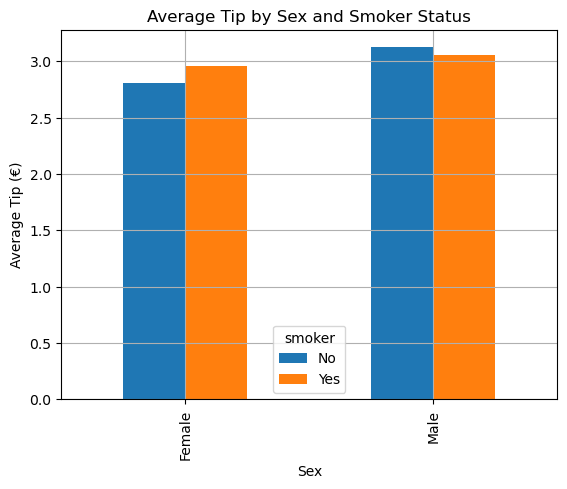

In [59]:
## 🔹 Task 5.1 Create a basic plot that helps visualize
# any pattern in the tips dataset — your choice of chart type.

import pandas as pd
import matplotlib.pyplot as plt

# Group and reshape
grouped = df.groupby(['sex', 'smoker'])['tip'].mean().unstack()

# Bar Plot
grouped.plot(kind='bar', title='Average Tip by Sex and Smoker Status')
plt.ylabel('Average Tip (€)')
plt.xlabel('Sex')
plt.grid(True)
plt.show()
